## 2.4 분류 예측의 불확실성 추정
- 불확실성 추정
    - 분류모델이 예측한 분류 클래스가 얼마나 정확한지 판단
    - scikit-learn 에서 제공하는 불확실성 추정 함수
        - decision_function
        - predict_prob
        
### 2.4.2 예측 확률

In [3]:
%matplotlib inline
import sys 
sys.path.append('..')
from preamble import *
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles

X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

#예제를 위해 클래스의 이름을 블루와 레드로 교체
y_named = np.array(["blue", "red"])[y]

X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=0,
              subsample=1.0, verbose=0, warm_start=False)

In [5]:
print("확률 값의 형태: {}".format(gbrt.predict_proba(X_test).shape))

확률 값의 형태: (25, 2)


In [8]:
print("예측 확률:\n{}".format(gbrt.predict_proba(X_test[:6])))
#두 클래스의 합이 1임

예측 확률:
[[ 0.016  0.984]
 [ 0.846  0.154]
 [ 0.981  0.019]
 [ 0.974  0.026]
 [ 0.014  0.986]
 [ 0.025  0.975]]


- 앞에서와 같은 데이터셋을 사용해 결정 경계와 클래스 1의 확률을 출력

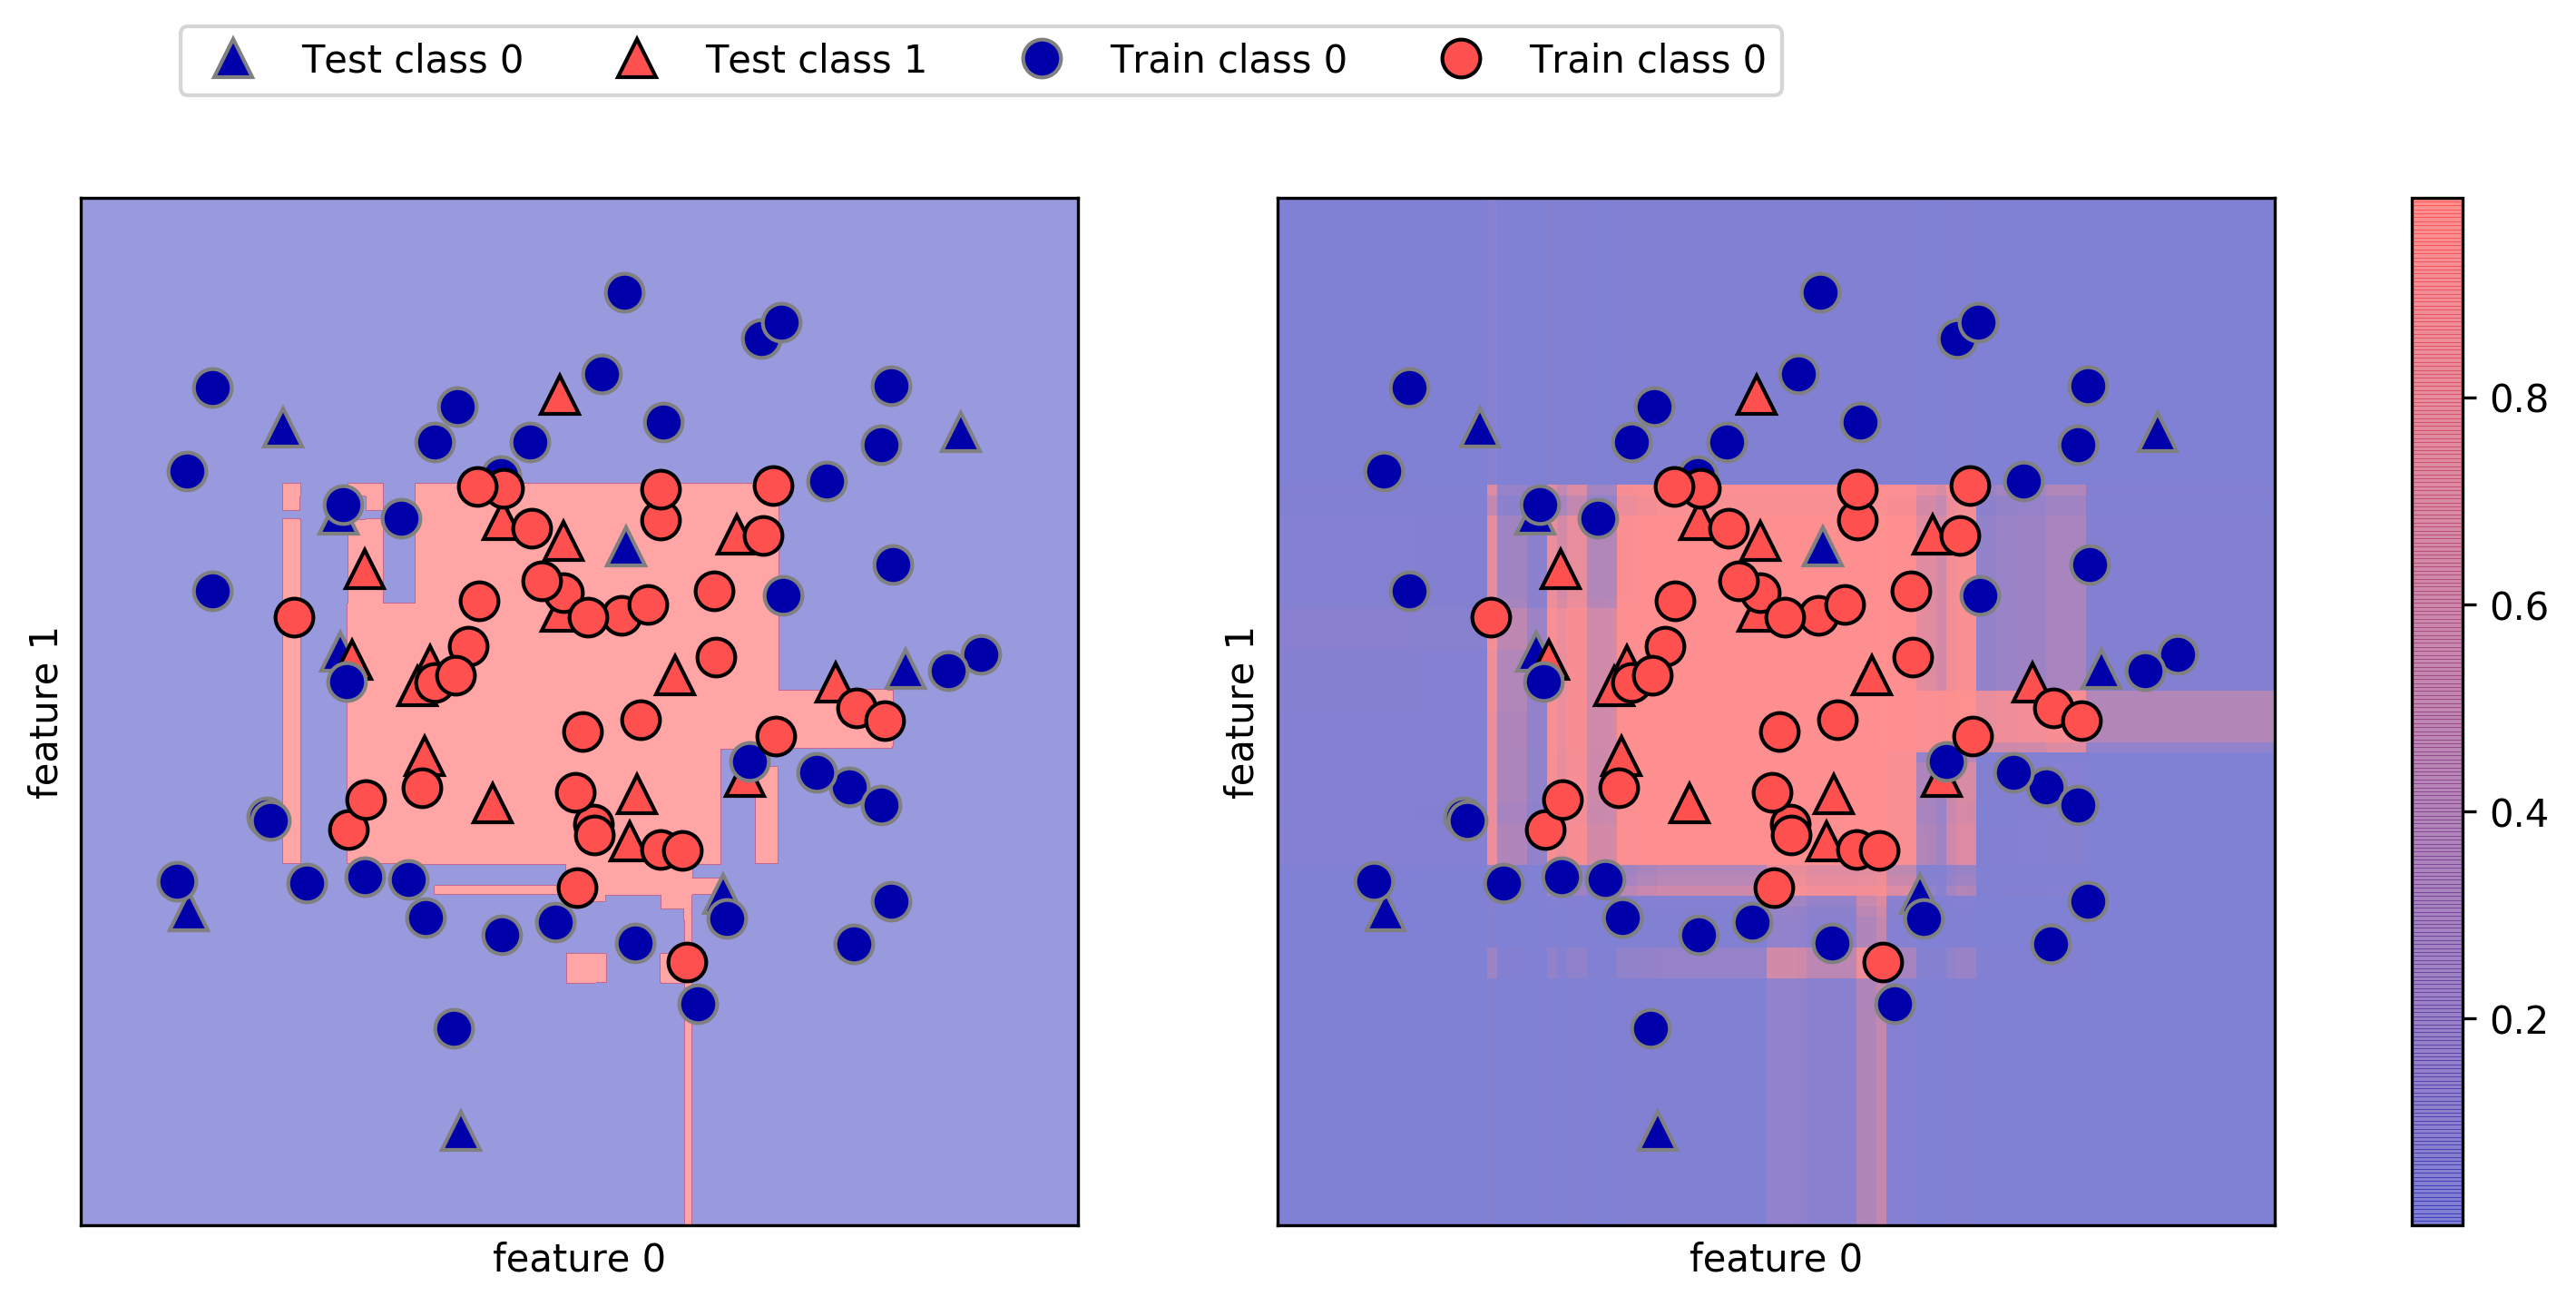

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["Test class 0", "Test class 1", "Train class 0", "Train class 0"], ncol=4, loc=(.1, 1.1))

- 그래프의 경계가 훨씬 잘 나나탐
- 불확실성이 있는 작은 영역들도 잘 확인 가능